# **Bloom Analysis - Pheno_Woody_Breaking**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

## Open file and load data

In [4]:
# download the csv file
pheno_woody_breaking_leaves = "https://drive.usercontent.google.com/download?id=1-JXNEX95PpJeyHCpO7EG1Dy-gcHSLjmP&export=download&authuser=0&confirm=t&uuid=fb851c17-f0b5-40d6-bba1-476a026d4387&at=APZUnTULYhkddgSFRBWc4q_nHLcT:1715039956424"
original_data = pd.read_csv(pheno_woody_breaking_leaves)

In [5]:
# presere a copy of the original data
df = original_data.copy()
# view the first five entries of the dataset
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Acer,rubrum,2,Home,ME,2011,117
1,Acer,rubrum,2,Home,ME,2012,83
2,Acer,rubrum,2,Home,ME,2013,114
3,Acer,rubrum,2,Home,ME,2014,125
4,Acer,rubrum,2,Home,ME,2015,124


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Genus      4927 non-null   object
 1   Species    4927 non-null   object
 2   Site_ID    4927 non-null   int64 
 3   Site_Name  4927 non-null   object
 4   State      4927 non-null   object
 5   Year       4927 non-null   int64 
 6   DOY        4927 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 269.6+ KB


## Unique Genera

62 unique genera:
['Acer' 'Amelanchier' 'Betula' 'Forsythia' 'Fraxinus' 'Hamamelis' 'Ilex'
 'Kalmia' 'Magnolia' 'Prunus' 'Quercus' 'Rhamnus' 'Tilia' 'Juglans'
 'Cercis' 'Cornus' 'Fagus' 'Malus' 'Corylus' 'Carya' 'Lindera'
 'Liquidambar' 'Liriodendron' 'Nyssa' 'Sassafras' 'Ulmus' 'Viburnum'
 'Populus' 'Rhus' 'Sambucus' 'Euonymus' 'Chamaedaphne' 'Rhododendron'
 'Toxicodendron' 'Aesculus' 'Ostrya' 'Cephalanthus' 'Vaccinium' 'Alnus'
 'Arctostaphylos' 'Symphoricarpos' 'Rosa' 'Celtis' 'Parthenocissus'
 'Aruncus' 'Spiraea' 'Gleditsia' 'Robinia' 'Berberis' 'Lonicera' 'Halesia'
 'Poncirus' 'Platanus' 'Diospyros' 'Ginkgo' 'Carpinus' 'Oxydendrum'
 'Gaylussacia' 'Morella' 'Salix' 'Pyrus' 'Asimina']


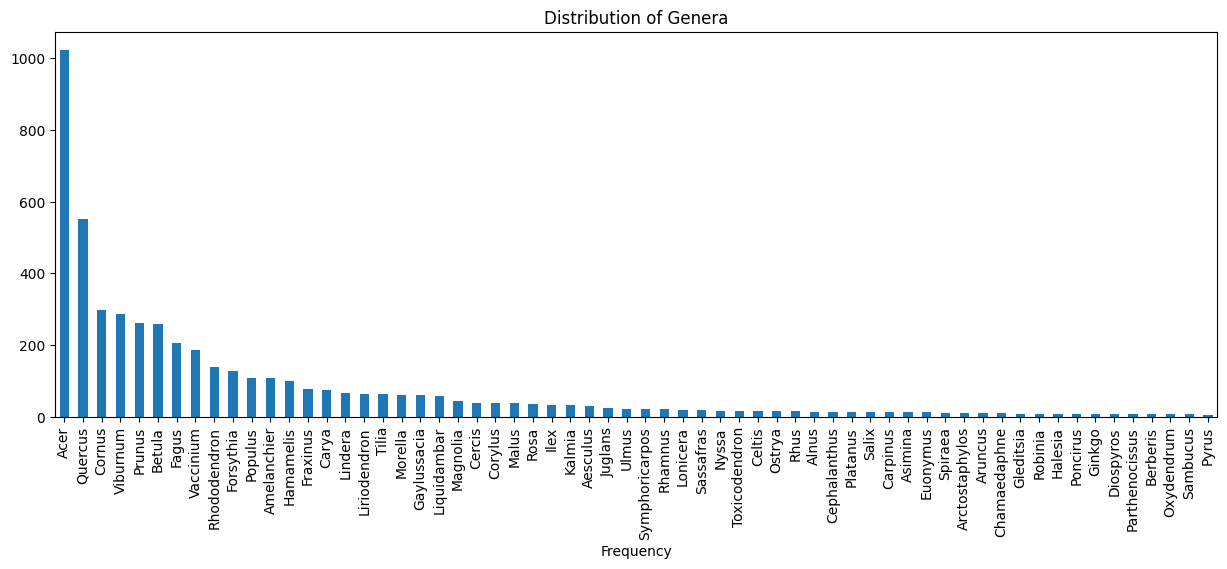

In [7]:
genus_list = df['Genus'].unique()

plt.figure(figsize = (15,5))
print(len(genus_list), 'unique genera:')
print(genus_list)
df['Genus'].value_counts().plot.bar()
plt.xlabel('Frequency')
plt.title('Distribution of Genera')
plt.show()

## Unique Species

103 unique species:
['rubrum' 'saccharum' 'arborea' 'papyrifera' 'spp.' 'americana'
 'virginiana' 'verticillata' 'latifolia' 'stellata' 'serotina' 'rubra'
 'velutina' 'cathartica' 'platanoides' 'canadensis' 'nigra'
 'florida-appalachianspring' 'grandifolia' 'florida' 'pumila' 'macrocarpa'
 'lenta' 'glabra' 'benzoin' 'styraciflua' 'tulipifera' 'sylvatica'
 'albidum' 'acerifolium' 'dentatum' 'prunifolium' 'saccharinum'
 'alnifolia' 'balsamifera' 'grandidentata' 'tremuloides' 'typhina'
 'racemosa' 'alba' 'alatus' 'calyculata' 'groenlandicum' 'radicans'
 'negundo' 'sericea' 'occidentalis' 'corymbosum' 'incana' 'alleghaniensis'
 'uva-ursi' 'albus' 'lantanoides' 'multiflora' 'rugosa' 'quinquefolia'
 'dioicus' 'vanhouttei' 'triacanthos' 'deltoides' 'palustris'
 'cordiformis' 'pseudoacacia' 'uliginosum' 'thunbergii' 'maackii'
 'alternifolia' 'morrowii' 'circinatum' 'pavia' 'kousa' 'carolina'
 'grandiflora' 'trifoliata' 'laurocerasus' 'pensylvanicum' 'spicatum'
 'grandiflora-autumnbrilliance' '

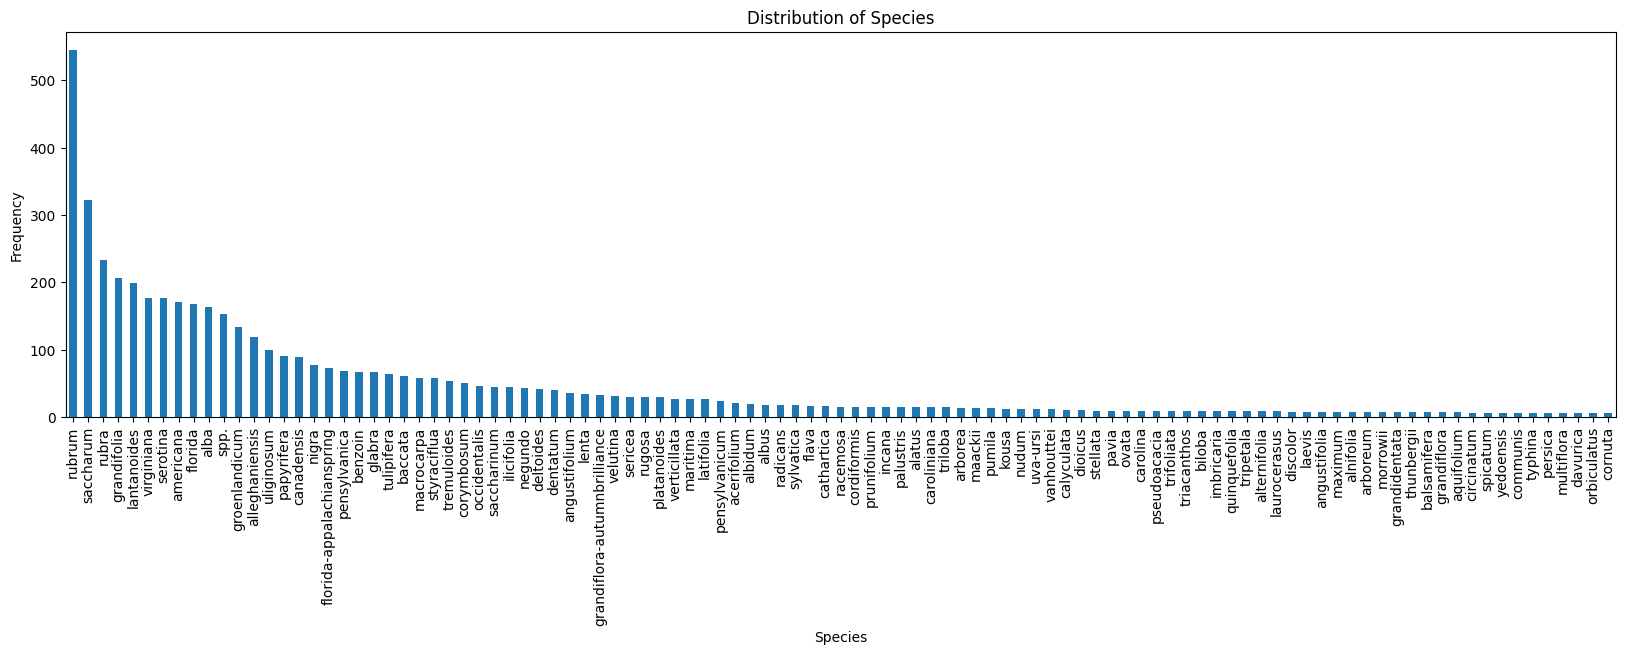

In [8]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

plt.figure(figsize=(20,5))
df['Species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Species')
plt.show()

## Sites and States

In [9]:
state_counts = df['State'].value_counts().reset_index()
print('state_counts: \n',state_counts.sort_values('count', ascending=False).head().to_markdown(),'\n')
state_sites = df.groupby('State')['Site_Name'].nunique().reset_index()
print('state_sites: \n',state_sites.sort_values('Site_Name', ascending = False).head().to_markdown())

state_counts: 
 |    | State   |   count |
|---:|:--------|--------:|
|  0 | NY      |    1713 |
|  1 | MA      |     718 |
|  2 | NH      |     703 |
|  3 | MN      |     604 |
|  4 | ME      |     447 | 

state_sites: 
 |    | State   |   Site_Name |
|---:|:--------|------------:|
| 13 | NH      |          42 |
| 15 | NY      |          36 |
|  6 | MA      |          30 |
| 10 | MN      |          20 |
|  8 | ME      |          14 |


In [10]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_sites['State'],
    z=state_sites['Site_Name'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Sites by State',
    geo_scope='usa'
)

fig.show()

In [11]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['count'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Data Points by State',
    geo_scope='usa'
)

fig.show()

### List of All Sites by State

In [12]:
# print all site names by state
df.groupby('State')['Site_Name'].value_counts()

State  Site_Name                                            
CT     Burlingham west                                            9
       South of garden terraces                                   9
IA     Savanna Trail                                              6
IL     backyard                                                  39
       02. 606-LAWNDALE-0.1/2.6-0.3/2.4 MM                        7
       01. 606-RIDGEWAY-0.0/2.7-0.1/2.6 MM                        7
       15. 606-ASHLAND--2.7/0.0MM TO END OF TRAIL                 6
       03. 606-DRAKE--0.3/2.4-0.5/2.2 MM                          6
       Home                                                       2
       My front yard                                              1
       back yard                                                  1
IN     Backyard                                                   5
       backyard                                                   1
KS     UKFS_065.phenology.phe - primary                

# Form groups based on unique combinations of genus, species, location

In [13]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Genus'][ind],df['Species'][ind], df['Site_Name'][ind], df['State'][ind])
  categories.append(category)
df['categories'] = categories

In [14]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,2,Home,ME,2011,117,"(Acer, rubrum, Home, ME)"
1,Acer,rubrum,2,Home,ME,2012,83,"(Acer, rubrum, Home, ME)"
2,Acer,rubrum,2,Home,ME,2013,114,"(Acer, rubrum, Home, ME)"
3,Acer,rubrum,2,Home,ME,2014,125,"(Acer, rubrum, Home, ME)"
4,Acer,rubrum,2,Home,ME,2015,124,"(Acer, rubrum, Home, ME)"


In [15]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique cominations of genus, species, and site in the data')

There are 591 unique cominations of genus, species, and site in the data


## Map each group to the subset of data that it consists of

In [16]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:


  criteria1 = df['Genus'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Site_Name'] == category[2]
  criteria4 = df['State'] == category[3]


  categorized_data.update({category:df[criteria1 & criteria2 & criteria3 & criteria4]})



## Visualize an Example

In [17]:
# enter search criteria
genus = 'Acer'
species = 'rubrum'
site = 'Home'
state = 'ME'

# view data associated with a given category group
example_data = categorized_data.get((genus, species, site, state))
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,2,Home,ME,2011,117,"(Acer, rubrum, Home, ME)"
1,Acer,rubrum,2,Home,ME,2012,83,"(Acer, rubrum, Home, ME)"
2,Acer,rubrum,2,Home,ME,2013,114,"(Acer, rubrum, Home, ME)"
3,Acer,rubrum,2,Home,ME,2014,125,"(Acer, rubrum, Home, ME)"
4,Acer,rubrum,2,Home,ME,2015,124,"(Acer, rubrum, Home, ME)"
5,Acer,rubrum,2,Home,ME,2016,121,"(Acer, rubrum, Home, ME)"


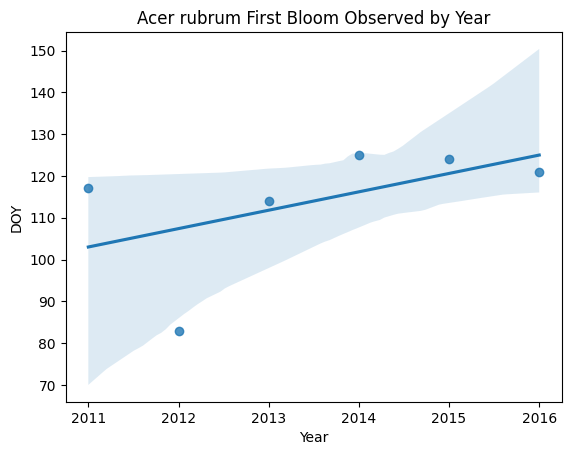

In [18]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])
plt.title(f'{genus} {species} First Bloom Observed by Year')
plt.show()

## Calculate Pearson correlation coefficient

In [19]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

0.5227

# Perform regression and calculate relevant stats for all 591 unique groups

In [20]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'dataset' : 'pheno_woody',
    'event' : 'breaking leaves',
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [21]:
# drop all rows containing NaN values (these result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view and save the dataframe
correlation_df.to_csv('/content/drive/MyDrive/Projects/Bloom Project/stats/woody_breaking_stats.csv', index=False) #running this line requires that you mount your drive!
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

         dataset            event                                                                                     grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0    pheno_woody  breaking leaves                                                                     (Acer, rubrum, Home, ME)             6     0.5227     0.3333      4.4  0.2732   0.2927
1    pheno_woody  breaking leaves                                                                  (Acer, saccharum, Home, ME)            13    -0.0738    -0.0645  -0.1319  0.0054   0.7314
2    pheno_woody  breaking leaves                                                             (Amelanchier, arborea, Home, ME)            13    -0.5149    -0.3637  -0.8242  0.2651   0.0567
3    pheno_woody  breaking leaves                                                               (Betula, papyrifera, Home, ME)            13    -0.1559    -0.2783  -0.3242  0.0243   0.5529
4    pheno_woody  breaking leaves                      

In [22]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,579.0,8.485320,2.099854,3.0000,7.00000,8.0000,10.00000,20.0000
Pearson r,579.0,-0.094473,0.399776,-0.9921,-0.41025,-0.0898,0.20700,0.9507
Kendall τ,579.0,-0.094988,0.305380,-1.0000,-0.29320,-0.1091,0.11400,0.8281
R²,579.0,0.168469,0.190170,0.0000,0.02305,0.1005,0.25465,0.9842
p-value,579.0,0.461836,0.299410,0.0006,0.19735,0.4373,0.70485,0.9997


### Restict observations to instances that saw a p-value < .05
#### Sorted by p-value


In [23]:
significant = correlation_df[correlation_df['p-value']<.05].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

         dataset            event                                                                                     grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
91   pheno_woody  breaking leaves                                                           (Quercus, rubra, Bridge Trail, NY)            12    -0.8410    -0.7385  -3.9879  0.7072   0.0006
258  pheno_woody  breaking leaves                                                 (Tilia, americana, Cayuga Nature Center, NY)             8    -0.9232    -0.9092  -2.7669  0.8523   0.0010
407  pheno_woody  breaking leaves                                          (Acer, saccharinum, Garden Way and Museum Lawn, NY)             8    -0.9158    -0.6429  -6.1389  0.8386   0.0013
9    pheno_woody  breaking leaves                                                               (Magnolia, stellata, Home, ME)             9    -0.8528    -0.6480  -2.9833  0.7273   0.0032
125  pheno_woody  breaking leaves                      

### Descriptive Statistics of Instance with p-value < .05:

In [24]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,38.0,8.868421,2.015763,6.0000,7.250000,9.00000,10.000000,12.0000
Pearson r,38.0,-0.482063,0.623271,-0.9409,-0.849250,-0.72965,-0.646075,0.8597
Kendall τ,38.0,-0.395005,0.498183,-1.0000,-0.690100,-0.55740,-0.459075,0.8281
R²,38.0,0.610621,0.144980,0.3394,0.492725,0.56765,0.726950,0.8853
p-value,38.0,0.020505,0.014516,0.0006,0.007925,0.01745,0.032600,0.0494


###Significant Instances with Positive Slope:

In [25]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.sort_values('slope', ascending = False).to_string())

         dataset            event                                           grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
251  pheno_woody  breaking leaves  (Quercus, palustris, Wood Lake Nature Center, MN)             6     0.8482     0.8281  7.6857  0.7194   0.0335
215  pheno_woody  breaking leaves           (Alnus, incana, SERC - Cattail Pond, ME)             7     0.8073     0.5238  6.6071  0.6518   0.0292
73   pheno_woody  breaking leaves                    (Quercus, macrocarpa, Home, MN)            10     0.8184     0.6293    2.95  0.6698   0.0043
202  pheno_woody  breaking leaves              (Cornus, florida, Michigan house, MI)             8     0.8597     0.6429  2.7381  0.7392   0.0068
378  pheno_woody  breaking leaves                      (Acer, rubrum, Back Yard, MN)             9     0.7796     0.4444  2.2306  0.6078   0.0149
379  pheno_woody  breaking leaves                 (Acer, saccharinum, Back Yard, MN)            10     0.7444     0.5843  2.

### Descriptive Statistics of Positively Sloped Instances:

In [26]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,7.0,8.428571,1.511858,6.0000,7.50000,9.0000,9.50000,10.0000
Pearson r,7.0,0.797771,0.050183,0.7268,0.76200,0.8073,0.83330,0.8597
Kendall τ,7.0,0.598300,0.121901,0.4444,0.52955,0.5843,0.63610,0.8281
R²,7.0,0.638643,0.079619,0.5283,0.58100,0.6518,0.69460,0.7392
p-value,7.0,0.019671,0.012352,0.0043,0.01085,0.0155,0.03135,0.0335


### Significant Instances with Negative Slope:

In [27]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.sort_values('slope').to_string())

         dataset            event                                                                                     grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
437  pheno_woody  breaking leaves                                                (Acer, platanoides, Norway Maple: 1 - 18, MA)             6    -0.8959    -0.7333 -24.5272  0.8027   0.0155
482  pheno_woody  breaking leaves                                                  (Carya, cordiformis, Rye Nature Center, NY)             6    -0.8688    -0.6901 -10.9286  0.7548   0.0243
407  pheno_woody  breaking leaves                                          (Acer, saccharinum, Garden Way and Museum Lawn, NY)             8    -0.9158    -0.6429  -6.1389  0.8386   0.0013
426  pheno_woody  breaking leaves                                     (Carya, glabra, Rock Garden and Native Plant Garden, NY)             6    -0.9409    -0.6901  -4.8043  0.8853   0.0049
415  pheno_woody  breaking leaves                      

### Descriptive Statistics of Negatively Sloped Instances:

In [28]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,31.0,8.967742,2.121067,6.0000,7.50000,9.0000,11.00000,12.0000
Pearson r,31.0,-0.771058,0.100543,-0.9409,-0.85535,-0.7502,-0.69105,-0.5826
Kendall τ,31.0,-0.619300,0.144638,-1.0000,-0.72380,-0.5872,-0.51415,-0.3817
R²,31.0,0.604294,0.156305,0.3394,0.47750,0.5629,0.73165,0.8853
p-value,31.0,0.020694,0.015138,0.0006,0.00795,0.0192,0.03200,0.0494


### Positive/Negative Slope Count

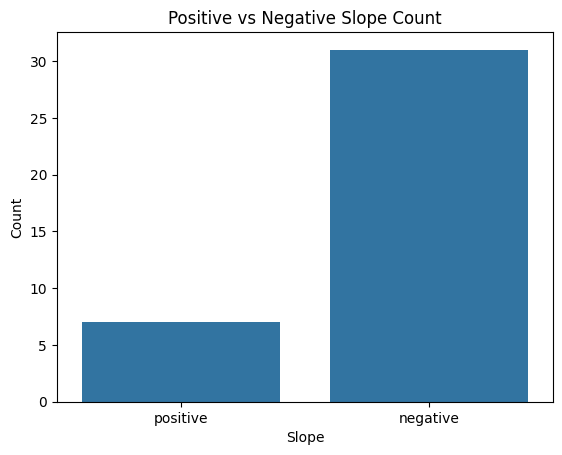

Number of positive slope examples: 7
Number of negative slope examples: 31


In [29]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 38, out of the original 591, groupings showed a statistically significant (p < .05) relationship between year and DOY
##7 have a positive slope
##31 have a negative slope